In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Bandit import Bandit
from Agent import Agent

In [3]:
np.random.seed(314)

In [4]:
def execute(epsilon):
    n_steps = 1000
    n_experiments = 2000
    cummulative_r = np.zeros((n_steps,))

    for i in range(n_experiments):
        bandit = Bandit()
        agent = Agent(epsilon)

        rewards = np.zeros((n_steps,))
        for j in range(n_steps):
            arm = agent.select_arm()
            reward = bandit.pull(arm)
            agent.update_estimates(arm, reward)
            rewards[j] = reward

        cummulative_r += rewards

    print("Recompensa media acumulada [epsilon =", epsilon, "]: ", cummulative_r[-1])

    return cummulative_r / n_experiments

In [5]:
eps_1 = execute(0.0)
eps_2 = execute(0.01)
eps_3 = execute(0.1)
eps_4 = execute(0.5)

Recompensa media acumulada [epsilon = 0.0 ]:  982.0
Recompensa media acumulada [epsilon = 0.01 ]:  1664.0
Recompensa media acumulada [epsilon = 0.1 ]:  1749.0
Recompensa media acumulada [epsilon = 0.5 ]:  1428.0


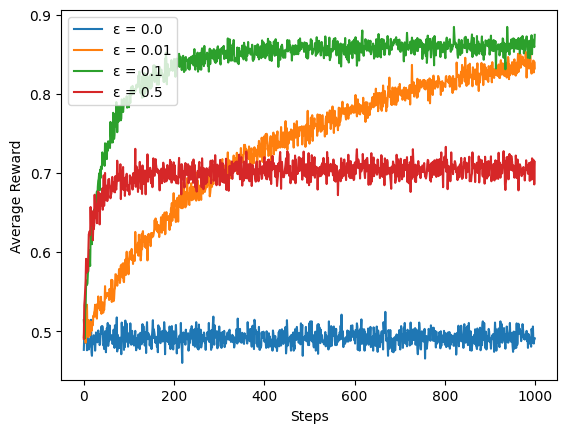

In [6]:
plt.plot(eps_1, label=f'ε = {0.0}')
plt.plot(eps_2, label=f'ε = {0.01}')
plt.plot(eps_3, label=f'ε = {0.1}')
plt.plot(eps_4, label=f'ε = {0.5}')

plt.legend()

ax = plt.gca()
plt.xlabel('Steps')
plt.ylabel('Average Reward')

plt.show()

### Comparando valores estimados con probabilidad real

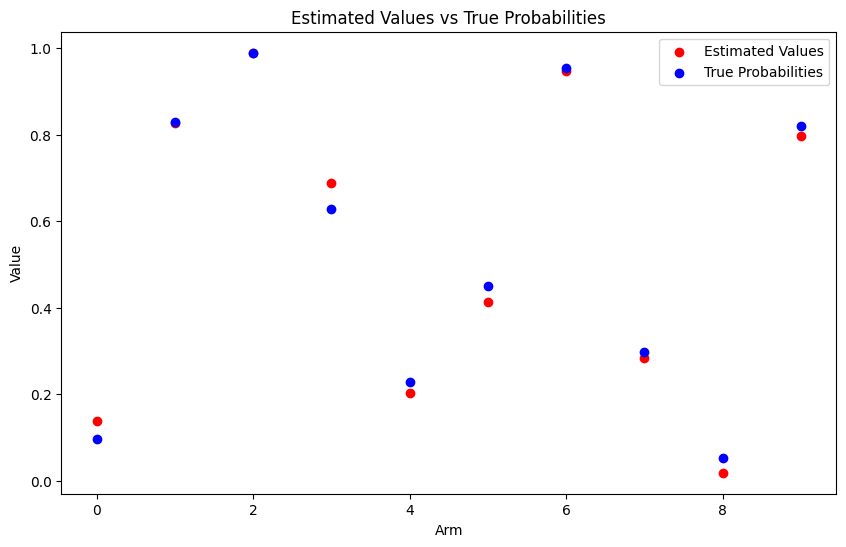

In [7]:
epsilon = 0.1
n_steps = 10000

bandit = Bandit()
agent = Agent(epsilon)

# Un experimento
for _ in range(n_steps):
    arm = agent.select_arm()
    reward = bandit.pull(arm)
    agent.update_estimates(arm, reward)

plt.figure(figsize=(10, 6))
plt.scatter(range(bandit.n_arms), agent.rewards, label='Estimated Values', color='red')
plt.scatter(range(bandit.n_arms), bandit.arms_probs, label='True Probabilities', color='blue')
plt.xlabel('Arm')
plt.ylabel('Value')
plt.title('Estimated Values vs True Probabilities')
plt.legend()
plt.show()